In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.preprocessing import MinMaxScaler, StandardScaler


# pip install thefuzz

# https://data.cityofnewyork.us/d/btm5-ppia/visualization
# Load datasets


# Data exploration

In [95]:

with open('speed_dfs.pkl', 'rb') as f:
    df_vol = pickle.load(f)

with open('df_vol_combined.pkl', 'rb') as f:
    df_vol_combined = pickle.load(f)

with open('df_vol_melt.pkl', 'rb') as f:
    df_vol_melt = pickle.load(f)

with open('df_speed.pkl', 'rb') as f:
    df_speed = pickle.load(f)

with open('df_seasonal_speed.pkl', 'rb') as f:
    df_seasonal_speed = pickle.load(f)


In [97]:
df_speed

,BOROUGH,DATA_AS_OF,ID,SPEED,TRAVEL_TIME,STATUS,LINK_ID,TRANSCOM_ID,Hour,Month,Season
0,Bronx,2024-01-01 00:00:00,210.636364,42.992765,115.871212,-15.303030,4.602849e+06,4.602849e+06,0,1,Winter
1,Bronx,2024-01-01 01:00:00,210.636364,40.283523,181.132576,-14.537879,4.602849e+06,4.602849e+06,1,1,Winter
2,Bronx,2024-01-01 02:00:00,210.636364,39.165417,176.636364,-14.537879,4.602849e+06,4.602849e+06,2,1,Winter
3,Bronx,2024-01-01 03:00:00,210.636364,40.810871,134.916667,-16.068182,4.602849e+06,4.602849e+06,3,1,Winter
4,Bronx,2024-01-01 04:00:00,210.636364,42.794735,151.087121,-15.303030,4.602849e+06,4.602849e+06,4,1,Winter
...,...,...,...,...,...,...,...,...,...,...,...
32910,Staten Island,2024-10-01 02:00:00,396.840000,41.543367,67.810000,-27.606667,4.604739e+06,4.604739e+06,2,10,Autumn
32911,Staten Island,2024-10-01 03:00:00,396.840000,43.477900,59.553333,-24.576667,4.604739e+06,4.604739e+06,3,10,Autumn
32912,Staten Island,2024-10-01 04:00:00,396.840000,45.070767,57.596667,-24.240000,4.604739e+06,4.604739e+06,4,10,Autumn
32913,Staten Island,2024-10-01 05:00:00,396.840000,42.678233,61.853333,-25.586667,4.604739e+06,4.604739e+06,5,10,Autumn


In [100]:
df_vol_combined

,ID,SegmentID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM,Month,Season
0,1929,76510,31 AVENUE,87 STREET,88 STREET,EB,01/25/2012,56,32,26,...,241.0,304.0,236.0,185.0,129.0,105.0,94.0,66.0,1,Winter
1,1930,76510,31 AVENUE,87 STREET,88 STREET,EB,01/26/2012,55,29,21,...,235.0,281.0,262.0,190.0,127.0,124.0,83.0,55.0,1,Winter
2,1931,76510,31 AVENUE,87 STREET,88 STREET,EB,01/27/2012,45,31,20,...,258.0,294.0,290.0,193.0,169.0,136.0,113.0,85.0,1,Winter
3,1932,76510,31 AVENUE,87 STREET,88 STREET,EB,01/28/2012,101,53,52,...,235.0,251.0,222.0,175.0,165.0,151.0,136.0,125.0,1,Winter
4,1933,76510,31 AVENUE,87 STREET,88 STREET,EB,01/29/2012,118,96,84,...,184.0,163.0,195.0,177.0,144.0,117.0,95.0,67.0,1,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,302,91529,SANFORD AVE,147th Street,149th Street,WB,11/18/2020,35,17,12,...,278.0,308.0,234.0,207.0,152.0,125.0,95.0,53.0,11,Autumn
326,302,91529,SANFORD AVE,147th Street,149th Street,WB,11/19/2020,44,17,5,...,282.0,290.0,251.0,241.0,194.0,113.0,93.0,59.0,11,Autumn
327,302,91529,SANFORD AVE,147th Street,149th Street,WB,11/20/2020,33,18,18,...,300.0,305.0,268.0,232.0,212.0,150.0,140.0,82.0,11,Autumn
328,302,91529,SANFORD AVE,147th Street,149th Street,WB,11/21/2020,51,28,20,...,293.0,318.0,235.0,270.0,181.0,127.0,120.0,75.0,11,Autumn


## SPEED VISUALIZATIONS

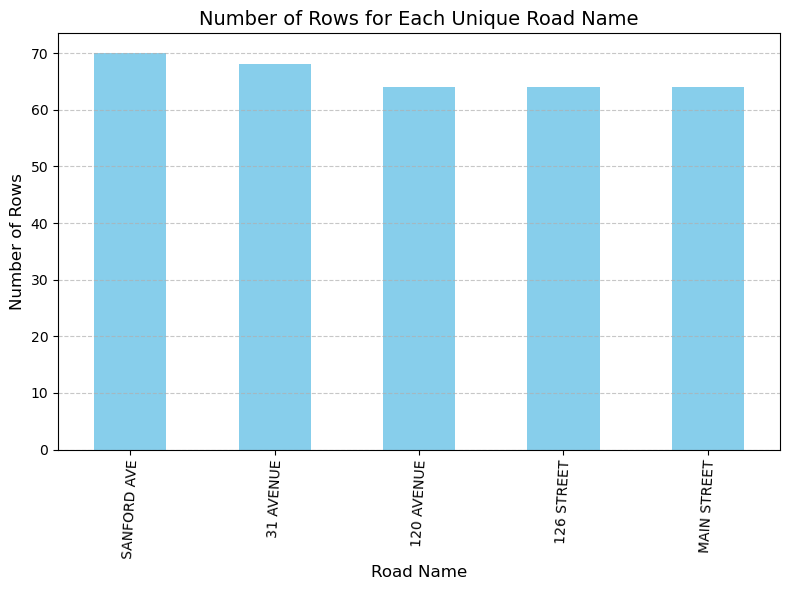

In [101]:
# Count the number of rows for each unique road name
def plot_num_rows(df):

    road_name_counts = df['Roadway Name'].value_counts()

    # Plot the count of rows for each unique road name
    plt.figure(figsize=(8, 6))
    road_name_counts.plot(kind='bar', color='skyblue')

    # Customizing the plot
    plt.title('Number of Rows for Each Unique Road Name', fontsize=14)
    plt.xlabel('Road Name', fontsize=12)
    plt.ylabel('Number of Rows', fontsize=12)
    plt.xticks(rotation=87)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
plot_num_rows(df_vol_combined)

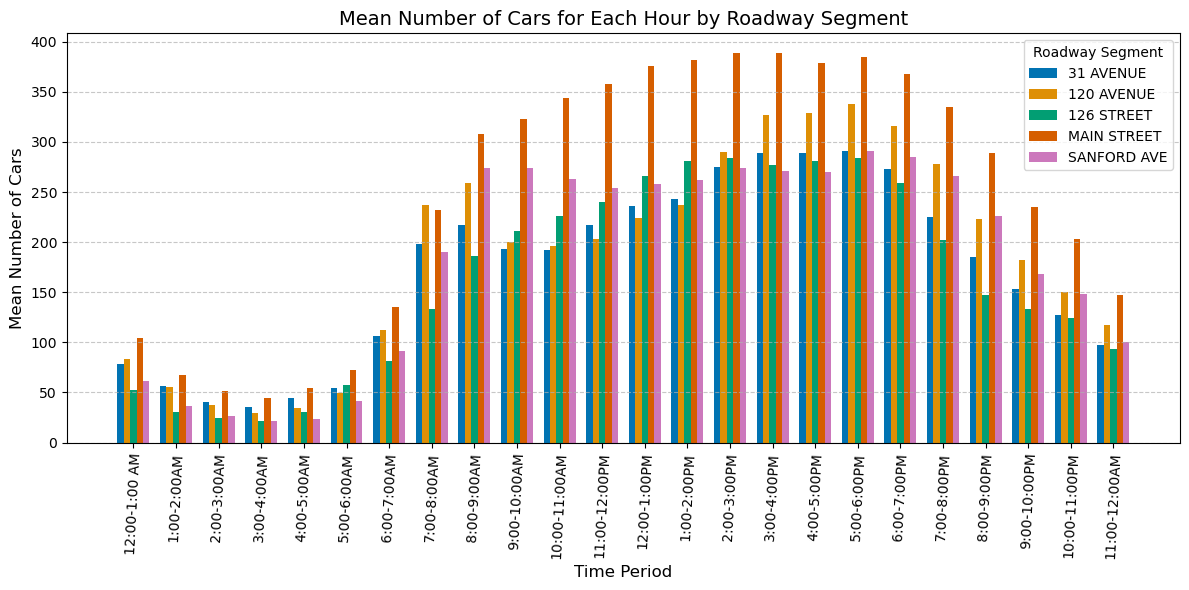

In [59]:
def plot_grouped_mean_cars(df_list):
    plt.figure(figsize=(12, 6))
    
    # Extract the time periods from the first dataframe
    vol_hour_columns = df_list[0].columns[7:]  # Adjust based on where your hourly columns start
    
    # Set the number of datasets (roadway segments) and time periods
    num_datasets = len(df_list)
    num_time_periods = len(vol_hour_columns)
    
    # Create an array for the bar positions
    bar_width = 0.15
    indices = np.arange(num_time_periods)
    
    # Get color-blind friendly colors
    colors = sns.color_palette("colorblind", num_datasets)
    
    # Plot each dataset in a separate bar group using the color-blind friendly colors
    for i, df in enumerate(df_list):
        mean_cars_per_hour = df[vol_hour_columns].mean()
        
        # Extract the roadway name for this dataset
        roadway_name = df['Roadway Name'].unique()[0]  # Assuming each dataframe contains a single roadway name
        
        # Shift the bars for each road segment to be side-by-side
        plt.bar(indices + i * bar_width, mean_cars_per_hour, width=bar_width, color=colors[i], label=roadway_name)
    
    # Customizing the plot
    plt.title('Mean Number of Cars for Each Hour by Roadway Segment', fontsize=14)
    plt.xlabel('Time Period', fontsize=12)
    plt.ylabel('Mean Number of Cars', fontsize=12)
    plt.xticks(indices + bar_width * (num_datasets - 1) / 2, vol_hour_columns, rotation=87)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title="Roadway Segment")
    
    # Show the plot
    plt.tight_layout()
    plt.show()
plot_grouped_mean_cars(df_vol)

In [69]:
df_vol_melt

,Season,Roadway Name,Hour,Volume
0,Winter,31 AVENUE,0,56.0
1,Winter,31 AVENUE,0,55.0
2,Winter,31 AVENUE,0,45.0
3,Winter,31 AVENUE,0,101.0
4,Winter,31 AVENUE,0,118.0
...,...,...,...,...
7915,Autumn,SANFORD AVE,23,53.0
7916,Autumn,SANFORD AVE,23,59.0
7917,Autumn,SANFORD AVE,23,82.0
7918,Autumn,SANFORD AVE,23,75.0


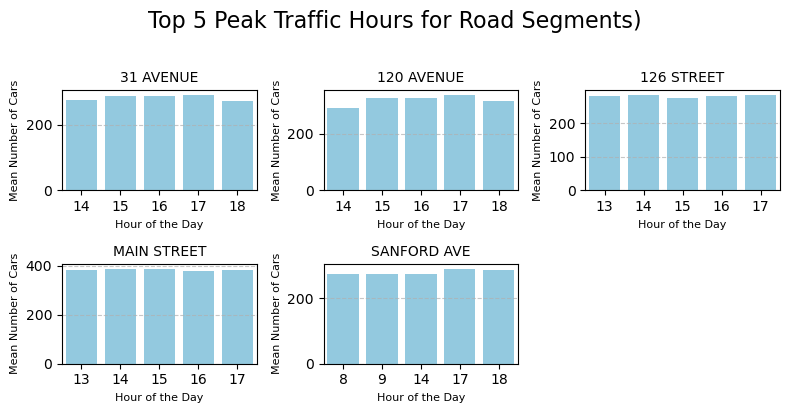

In [102]:
def plot_peak_hours_2x2(df, top_n=5):
    """
    Function to calculate and plot the peak hours for each unique road segment in a 2x2 subplot arrangement.
    
    Parameters:
    df (DataFrame): The DataFrame containing the volume data
    top_n (int): Number of top peak hours to display (default is 5)
    """
    unique_road_segments = df['Roadway Name'].unique()
    num_segments = len(unique_road_segments)
    plots_per_page = 6  # We will show 4 plots (2x2) on each page

    # Calculate the number of pages required
    num_pages = math.ceil(num_segments / plots_per_page)

    for page in range(num_pages):
        # Define subplots: 2 rows and 2 columns (total 4 plots)
        fig, axes = plt.subplots(2, 3, figsize=(8, 4))
        axes = axes.flatten()

        # Iterate through road segments for this page
        start_index = page * plots_per_page
        end_index = min(start_index + plots_per_page, num_segments)

        for i, road_segment_name in enumerate(unique_road_segments[start_index:end_index]):
            # Filter data for the specific road segment
            df_segment = df[df['Roadway Name'] == road_segment_name]
            
            # Group by 'Hour' and calculate the mean volume for each hour
            mean_cars_per_hour = df_segment.groupby('Hour')['Volume'].mean().sort_values(ascending=False).head(top_n)

            # Plot the mean number of cars for the top peak hours
            sns.barplot(x=mean_cars_per_hour.index, y=mean_cars_per_hour.values, ax=axes[i], color='skyblue')
            axes[i].set_title(f'{road_segment_name}', fontsize=10)
            axes[i].set_xlabel('Hour of the Day', fontsize=8)
            axes[i].set_ylabel('Mean Number of Cars', fontsize=8)
            axes[i].grid(axis='y', linestyle='--', alpha=0.7)

        # Hide unused subplots in the grid if there are fewer than 4 road segments on the last page
        for j in range(end_index - start_index, plots_per_page):
            fig.delaxes(axes[j])


        fig.suptitle(f'Top {top_n} Peak Traffic Hours for Road Segments)', fontsize=16, y=1.02)
        plt.tight_layout()
        plt.show()
plot_peak_hours_2x2(df_vol_melt, top_n=5)

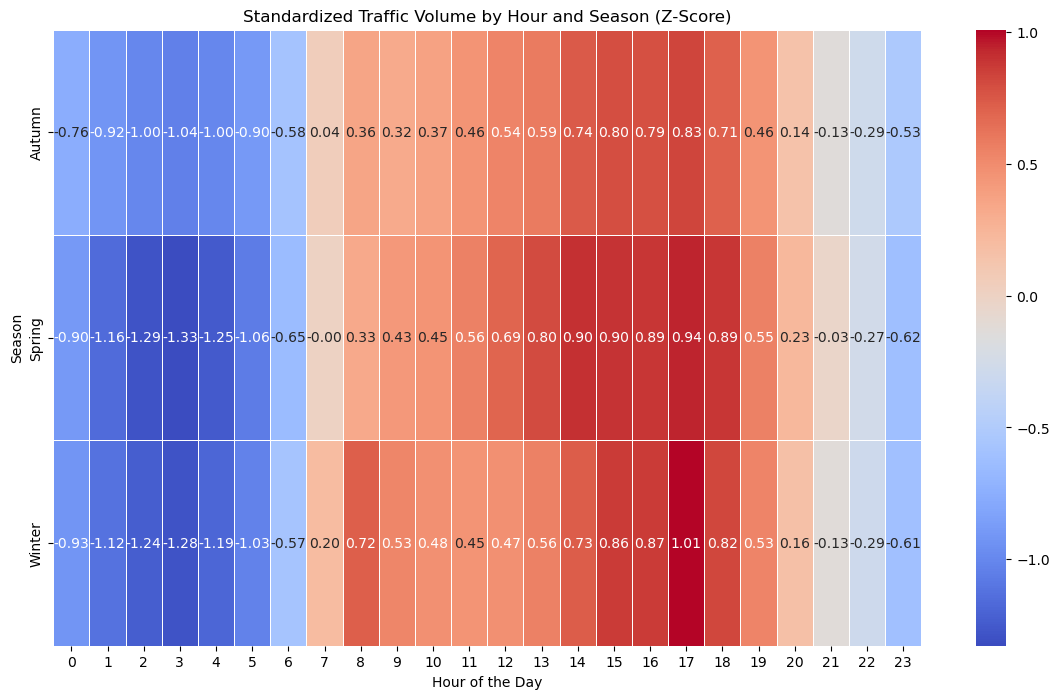

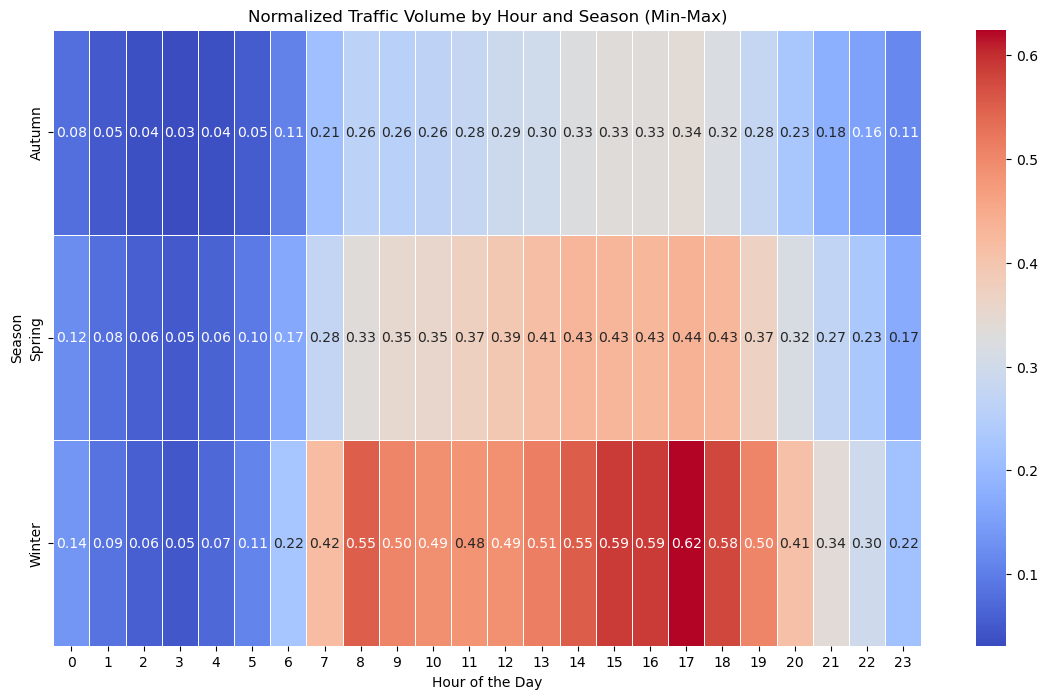

In [ ]:
# Standardize the 'Volume' within each season using Z-score standardization
def standardize_season(group):
    scaler = StandardScaler()
    group['Volume'] = scaler.fit_transform(group[['Volume']])
    return group

df_standardized = df_vol_melt.groupby('Season').apply(standardize_season)

# Normalize the 'Volume' within each season using Min-Max normalization
def normalize_season(group):
    scaler = MinMaxScaler()
    group['Volume'] = scaler.fit_transform(group[['Volume']])
    return group

df_normalized = df_vol_melt.groupby('Season').apply(normalize_season)

# Group by 'Season' and 'Hour' to calculate the average standardized volume
df_grouped_standardized = df_standardized.groupby(['Season', 'Hour'])['Volume'].mean().reset_index()

# Group by 'Season' and 'Hour' to calculate the average normalized volume
df_grouped_normalized = df_normalized.groupby(['Season', 'Hour'])['Volume'].mean().reset_index()

# Pivot the data to create matrices for the heatmaps
heatmap_data_standardized = df_grouped_standardized.pivot(index='Season', columns='Hour', values='Volume')
heatmap_data_normalized = df_grouped_normalized.pivot(index='Season', columns='Hour', values='Volume')

# Create heatmaps for standardized and normalized data
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data_standardized, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Standardized Traffic Volume by Hour and Season (Z-Score)')
plt.xlabel('Hour of the Day')
plt.ylabel('Season')
plt.show()

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data_normalized, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Normalized Traffic Volume by Hour and Season (Min-Max)')
plt.xlabel('Hour of the Day')
plt.ylabel('Season')
plt.show()

## SPEED VISUALIZATIONS

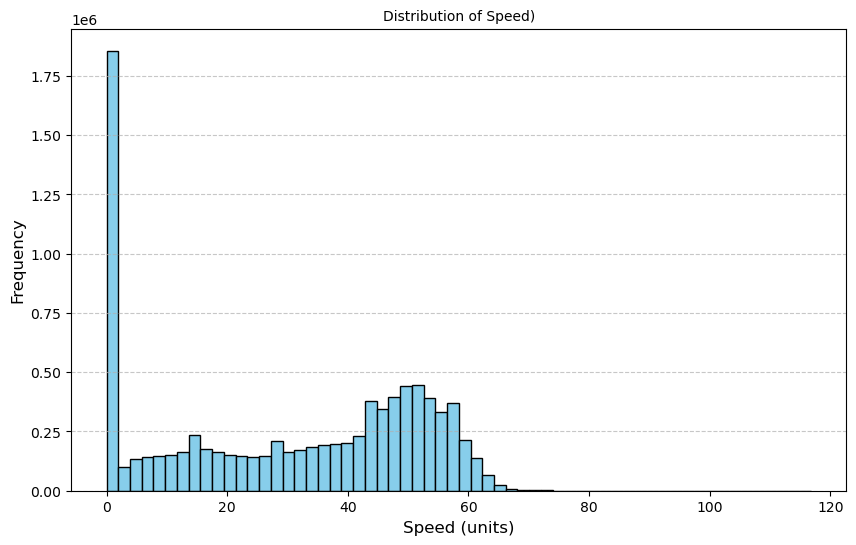

In [16]:
# histogram for speed
plt.figure(figsize=(10, 6))
plt.hist(df_speed_clean['SPEED'], bins=60, color='skyblue', edgecolor='black')
plt.title('Distribution of Speed)', fontsize=10)
plt.xlabel('Speed (units)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [17]:
# Ensure the 'Date' column in the original dataframe is in datetime format before slicing
df_vol_clean['Date'] = pd.to_datetime(df_vol_clean['Date'])

# Define winter and summer months
winter_months = [12, 1, 2]  # December, January, February
summer_months = [6, 7, 8]   # June, July, August

# Function to plot winter vs summer traffic volumes for a specific road segment
def plot_winter_vs_summer(df, road_segment_name):
    """
    Function to plot winter vs summer traffic volumes for a specific road segment.
    
    Parameters:
    df (DataFrame): The DataFrame containing the volume data
    road_segment_name (str): The name of the road segment to filter
    """
    # Print the current road segment
    print(f"Processing road segment: {road_segment_name}")
    
    # Filter data for the specific road segment
    df_segment = df[df['Roadway Name'] == road_segment_name].copy()

    # Extract the time interval columns (assuming they start at column index 7)
    hour_columns = df_segment.columns[7:]

    # Filter data for winter and summer months
    df_winter = df_segment[df_segment['Date'].dt.month.isin(winter_months)]
    df_summer = df_segment[df_segment['Date'].dt.month.isin(summer_months)]

    # Check if there is data for winter and summer
    if df_winter.empty:
        print(f"No winter data for {road_segment_name}")
    if df_summer.empty:
        print(f"No summer data for {road_segment_name}")

    # Calculate the mean number of cars for each time period (hourly) for winter and summer
    if not df_winter.empty:
        mean_cars_per_hour_winter = df_winter[hour_columns].mean()
        print(f"Winter mean for {road_segment_name}:")
        print(mean_cars_per_hour_winter)
    else:
        mean_cars_per_hour_winter = None
    
    if not df_summer.empty:
        mean_cars_per_hour_summer = df_summer[hour_columns].mean()
        print(f"Summer mean for {road_segment_name}:")
        print(mean_cars_per_hour_summer)
    else:
        mean_cars_per_hour_summer = None

    print("-----")

# Get a list of unique roadway names in the dataset
unique_road_names = df_vol_clean['Roadway Name'].unique()

# Loop through each road segment and plot the winter vs summer data
for road_name in unique_road_names:
    plot_winter_vs_summer(df_vol_clean, road_name)

Processing road segment: sanford ave
No summer data for sanford ave
Winter mean for sanford ave:
12:00-1:00 AM     64.916667
1:00-2:00AM       38.500000
2:00-3:00AM       26.166667
3:00-4:00AM       20.083333
4:00-5:00AM       26.750000
5:00-6:00AM       43.666667
6:00-7:00AM      103.166667
7:00-8:00AM      220.250000
8:00-9:00AM      321.666667
9:00-10:00AM     287.000000
10:00-11:00AM    264.583333
11:00-12:00PM    245.250000
12:00-1:00PM     252.416667
1:00-2:00PM      265.833333
2:00-3:00PM      284.333333
3:00-4:00PM      293.083333
4:00-5:00PM      277.583333
5:00-6:00PM      304.416667
6:00-7:00PM      305.083333
7:00-8:00PM      290.916667
8:00-9:00PM      245.000000
9:00-10:00PM     182.416667
10:00-11:00PM    162.250000
11:00-12:00AM    107.666667
dtype: float64
-----
Processing road segment: sanford avenue
No winter data for sanford avenue
No summer data for sanford avenue
-----


In [18]:
# fuel model: 

 # yapfucntion(mean_cars_per_hour) = Volume i

#print(mean_cars_per_hour) # Mean cars per hour FOR ALL OR FOR JUST BRONX OR WHATEVER
print(mean_cars_per_hour[:24])


12:00-1:00 AM     61.600000
1:00-2:00AM       36.900000
2:00-3:00AM       26.457143
3:00-4:00AM       21.214286
4:00-5:00AM       23.728571
5:00-6:00AM       41.400000
6:00-7:00AM       91.128571
7:00-8:00AM      190.071429
8:00-9:00AM      274.400000
9:00-10:00AM     274.357143
10:00-11:00AM    262.842857
11:00-12:00PM    254.214286
12:00-1:00PM     257.742857
1:00-2:00PM      262.228571
2:00-3:00PM      273.657143
3:00-4:00PM      271.300000
4:00-5:00PM      269.814286
5:00-6:00PM      290.542857
6:00-7:00PM      285.357143
7:00-8:00PM      266.414286
8:00-9:00PM      226.500000
9:00-10:00PM     167.785714
10:00-11:00PM    148.042857
11:00-12:00AM     99.942857
dtype: float64


In [27]:
# Create separate lists for each borough and their hourly speeds
boroughs = mean_speed_per_hour_per_borough['BOROUGH'].unique()

# Create a dictionary to store the hourly speeds for each borough
borough_hourly_speeds = {}

# Loop over each borough and create a list of (Hour, Average Speed) tuples
for borough in boroughs:
    borough_data = mean_speed_per_hour_per_borough[mean_speed_per_hour_per_borough['BOROUGH'] == borough]
    hourly_speed_list = list(zip(borough_data['Hour'], borough_data['Average Speed']))
    borough_hourly_speeds[borough] = hourly_speed_list

# Extract lists for each borough
bronx_hourly = borough_hourly_speeds.get('Bronx', [])
brooklyn_hourly = borough_hourly_speeds.get('Brooklyn', [])
queens_hourly = borough_hourly_speeds.get('Queens', [])
manhattan_hourly = borough_hourly_speeds.get('Manhattan', [])
staten_island_hourly = borough_hourly_speeds.get('Staten Island', [])

# Now you have the hourly speed data for each borough
print("Bronx Hourly:", bronx_hourly)
print("Brooklyn Hourly:", brooklyn_hourly)
print("Queens Hourly:", queens_hourly)
print("Manhattan Hourly:", manhattan_hourly)
print("Staten Island Hourly:", staten_island_hourly)

           BOROUGH      Hour  Average Speed
0            Bronx  00:00:00      39.066408
1            Bronx  01:00:00      40.652314
2            Bronx  02:00:00      41.506554
3            Bronx  03:00:00      42.275486
4            Bronx  04:00:00      42.864847
..             ...       ...            ...
115  Staten Island  19:00:00      31.870806
116  Staten Island  20:00:00      33.866476
117  Staten Island  21:00:00      35.068609
118  Staten Island  22:00:00      35.393288
119  Staten Island  23:00:00      35.941647

[120 rows x 3 columns]
Bronx Hourly: [(datetime.time(0, 0), 39.06640789301901), (datetime.time(1, 0), 40.652313875812105), (datetime.time(2, 0), 41.506554031531444), (datetime.time(3, 0), 42.275486458778666), (datetime.time(4, 0), 42.86484698974426), (datetime.time(5, 0), 41.90662985446642), (datetime.time(6, 0), 37.20273231960694), (datetime.time(7, 0), 34.332336825916855), (datetime.time(8, 0), 32.02607612683245), (datetime.time(9, 0), 31.104949292084697), (datetim

In [24]:
from fuel_model import calculate_total_fuel_consumption

volume = mean_cars_per_hour.values  # This will give you a NumPy array of values
speed = mean_speed_per_hour_per_borough['Average Speed'].values  # Extract speed column as a NumPy array

# Check if the values are correctly prepared
print(volume)
print(speed)

print(calculate_total_fuel_consumption(volume, speed, 10, a=0.01, b=2, c=0.1))




[ 61.6         36.9         26.45714286  21.21428571  23.72857143
  41.4         91.12857143 190.07142857 274.4        274.35714286
 262.84285714 254.21428571 257.74285714 262.22857143 273.65714286
 271.3        269.81428571 290.54285714 285.35714286 266.41428571
 226.5        167.78571429 148.04285714  99.94285714]
[33.17017912 33.83104354 34.54825722 35.46247445 36.89037565 37.23057804
 33.5070735  30.83757548 29.08405924 28.99819464 28.51258415 27.94465086
 27.79982988 27.28958778 25.7679563  24.1199822  23.30746866 23.46049632
 25.23191747 28.32678363 30.44405891 31.72015077 32.16485362 32.50075689]
61.6  skooby [33.17017912 33.83104354 34.54825722 35.46247445 36.89037565 37.23057804
 33.5070735  30.83757548 29.08405924 28.99819464 28.51258415 27.94465086
 27.79982988 27.28958778 25.7679563  24.1199822  23.30746866 23.46049632
 25.23191747 28.32678363 30.44405891 31.72015077 32.16485362 32.50075689]
36.9  skooby [33.17017912 33.83104354 34.54825722 35.46247445 36.89037565 37.230578